# ASSIGNED Pressure drop with heat exchanger

**This is an exam. You have to work alone on this problem. You are free to consult the book, your notes, the lecture notes, your homeworks and the posted solutions.**
![img](//www.zoitz.com/comics/chemistry.png)

The reaction $2A \leftrightharpoons C$ is carried out in a packed bed reactor with a constant ambient temperature heat exchanger. There is a pressure drop along the length of the reactor.
The parameters for this problem are summarized here:

-   Cpa = 40.0 J / mol / K
-   Cpc = 80.0 J / mol / K
-   Hrx = -40,000 J/mol
-   Ea = 41,800 J / mol
-   k = 0.5 L<sup>2</sup>/kg/min/mol at 450 K
-   Kc = 25,000 L/mol at 450 K (equilibrium constant)
-   Ca0 = 0.271 mol / L (inlet concentration, pure A is fed)
-   T0 = 450 K
-   FA0 = 5 mol / min
-   P0 = 10 atm (inlet pressure)
-   Ta = 500 K (heat exchanger temperature)
-   Ua = 0.015 J/kg/min/K
-   &alpha; = 0.015 1/kg  (pressure drop parameter)

Plot the conversion, reduced pressure (y), and temperature in the reactor from W=0 kg to W = 20 kg

Explain what happens around 16 kg of catalyst (i.e. why does the conversion level off?).

# solution

Here is our data. Here are a few points:

-   $\Delta C_p = 0$ so we do not need to consider the temperature dependence of the reaction energy.
-   We still have to consider the temperature dependence of the equilibrium constant, so we have to assume a temperature that we know K at. I chose 450 K.

The rate law for an equilibrium reaction should be: $r_A = k(C_A^2 - Cc / Kc)$.
Usually we use units of mol/L/min for reaction rates.

In [1]:
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
import matplotlib.pyplot as plt

Cpa = 40.0  # J / mol / K
Cpc = 80.0

Hrx = -40000.0 # J / mol

R = 8.314 # J / mol / K
Ea = 41800.0 # J / mol
k_450 = 0.5  # L**2/kg/min/mol at 450 K

Kc_450 = 25000.0  # L/mol at 450 K

Ca0 = 0.271  # mol / L
Fa0 = Ft0 = 5.0    # mol / min

v0 = Fa0 / Ca0

P0 = 10.0     # atm
T0 = 450.0  # K

Ta = 500
Ua = 0.8    # J/kg/min/K
alpha = 0.015  # 1/kg

The solution is a pretty standard mole and energy balance. We do have to consider the change in the volumetric flow rate from the pressure drop and from the temperature changes.

In [1]:
def pfr(Y, W):
    Fa, y, T = Y

    # get overall molar flow
    xi = (Fa - Fa0) / (-2)
    Fc = xi
    Ft = Fa + Fc

    # we need v.  y = P / P0
    v = v0 * (Ft / Ft0) * (1.0 / y) * (T / T0)
    Ca = Fa / v
    Cc = Fc / v

    k = k_450 * np.exp(-Ea / R * (1.0 / T - 1.0 / 450.0))

    Kc = Kc_450 * np.exp(-Hrx / R * (1.0 / T - 1.0 / 450.0))

    r = k * (Ca**2 - Cc / Kc)
    ra = -2 * r

    # mole balance
    dFadW = ra

    # pressure drop
    dydW = -alpha / (2 * y) * Ft / Ft0 * T / T0

    # energy balance
    Qdot = Ua * (Ta - T)
    dTdW = (-Hrx * r + Qdot) / (Fa * Cpa + Fc * Cpc)

    return [dFadW, dydW, dTdW]

Now we can solve the problem.

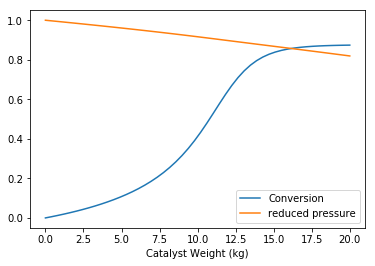

In [1]:
Wspan = np.linspace(0, 20)
Y0 = [Fa0, 1.0, T0]

sol = odeint(pfr, Y0, Wspan)

Fa = sol[:,0]
y = sol[:, 1]
T = sol[:,2]

X = (Fa0 - Fa) / Fa0

plt.plot(Wspan, X, Wspan, y)
plt.legend(['Conversion', 'reduced pressure'], loc='best')
plt.xlabel('Catalyst Weight (kg)')

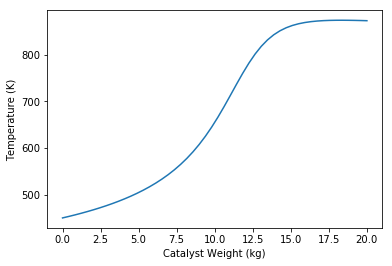

In [1]:
plt.figure()
plt.plot(Wspan, T)
plt.xlabel('Catalyst Weight (kg)')
plt.ylabel('Temperature (K)')

Around 16 kg of catalyst the reaction nears its equilibrium conversion, so the rate goes to zero and the temperature levels off because no heat is being generated.